In [5]:
!pip uninstall opencv-python -y
# downgrade OpenCV a bit since some none-free features are not avilable
!pip install opencv-contrib-python==3.4.2.17 --force-reinstall

  Using cached https://files.pythonhosted.org/packages/12/32/8d32d40cd35e61c80cb112ef5e8dbdcfbb06124f36a765df98517a12e753/opencv_contrib_python-3.4.2.17-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/73/ef/8967d406f3f85018ceb5efab50431e901683188f1741ceb053efcab26c87/numpy-1.20.2-cp37-cp37m-manylinux2010_x86_64.whl
ERROR: imgaug 0.2.9 requires opencv-python, which is not installed.
ERROR: dopamine-rl 1.0.5 requires opencv-python>=3.4.1.15, which is not installed.
ERROR: albumentations 0.1.12 requires opencv-python, which is not installed.
ERROR: tensorflow 2.4.1 has requirement numpy~=1.19.2, but you'll have numpy 1.20.2 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.20.2
    Uninstalling numpy-1.20.2:
     

In [1]:
import cv2
import math
import pandas as pd
from google.colab.patches import cv2_imshow
from google.colab import drive
import numpy as np
from scipy.spatial import distance

In [2]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


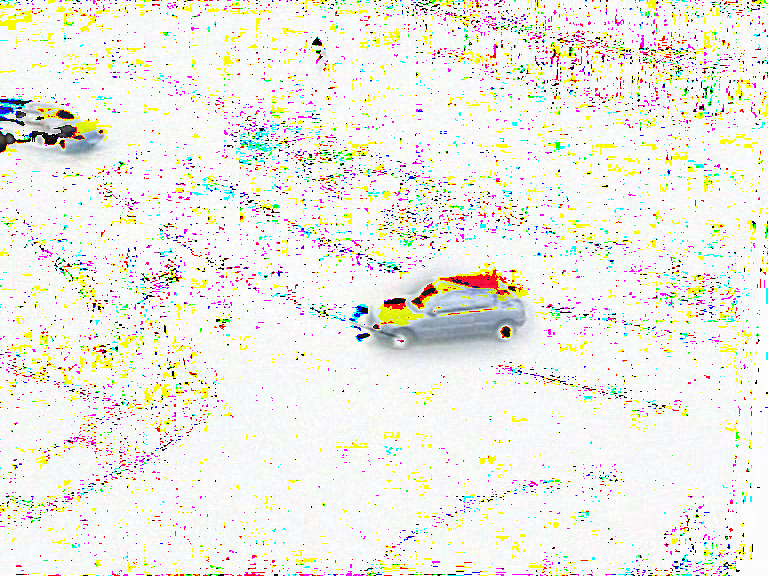

In [7]:
cap=cv2.VideoCapture(opath)
cap.set(cv2.CAP_PROP_POS_FRAMES,5)
cap1=cv2.VideoCapture(fpath)
cap1.set(cv2.CAP_PROP_POS_FRAMES,5)
ret,frame1=cap.read()
ret,frame2=cap1.read()
cv2_imshow(frame2-frame1)

In [4]:
opath="/content/gdrive/MyDrive/First year/Second sem/Security and forenics 2/Assignment 4/o.avi"
fpath="/content/gdrive/MyDrive/First year/Second sem/Security and forenics 2/Assignment 4/f.avi"
f1path="/content/gdrive/MyDrive/First year/Second sem/Security and forenics 2/Assignment 4/f1.avi"
f2path="/content/gdrive/MyDrive/First year/Second sem/Security and forenics 2/Assignment 4/f2.avi"

In [ ]:
def statisticalRowDescriptors(image):
    img=np.zeros((image.shape[0],image.shape[1]+3))
    img[0:image.shape[0],1:image.shape[1]+1]=image[0:image.shape[0],0:image.shape[1]]
    vec1=np.zeros((25,25),int)
    r=np.zeros((image.shape[0],image.shape[1]))
    for i in range(image.shape[0]):
        for j in range(1,image.shape[1]+1):
            t=(img[i][j-1]-3*img[i][j]+3*img[i][j+1]-img[i][j+2])/3
            if(t<-2):
                t=-2
            if(t>2):
                t=2
            t=round(t)  
            r[i][j-1]=t+2
    m=0
    n=0
    for i in range(r.shape[0]-3):
        for j in range(r.shape[1]):
            k0=r[i][j]
            k1=r[i+1][j]
            k2=r[i+2][j]
            k3=r[i+3][j]

            m1=int(k3*5+k2)                  #int(k3*5+k2)
            n1=int(k1*5+k0)                  #int(k1*5+k0)
            
            m2=int(k0*5+k1)
            n2=int(k2*5+k3)
            if(m1<=n1):
                m=m1
                n=n1
            else:
                m=m2
                n=n2  
                        
            vec1[m][n]+=1
    strvec=[]
    for i in range(vec1.shape[0]):
        for j in range(i,vec1.shape[1]):
            strvec.append(vec1[i][j])   
    return strvec

In [ ]:
def statisticalColumnDescriptors(image):
    img=np.zeros((image.shape[0]+3,image.shape[1]))
    img[1:image.shape[0]+1,0:image.shape[1]]=image[0:image.shape[0],0:image.shape[1]]
    vec1=np.zeros((25,25),int)
    r=np.zeros((image.shape[0],image.shape[1]))
    for i in range(1,image.shape[0]+1):
        for j in range(image.shape[1]):
            t=(img[i-1][j]-3*img[i][j]+3*img[i+1][j]-img[i+2][j])/3
            if(t<-2):
                t=-2
            if(t>2):
                t=2
            t=round(t)   
            r[i-1][j]=t+2

    m=0
    n=0
    for i in range(r.shape[0]):
        for j in range(r.shape[1]-3):
            k0=r[i][j]
            k1=r[i][j+1]
            k2=r[i][j+2]
            k3=r[i][j+3]

            m1=int(k3*5+k2)                  #int(k3*5+k2)
            n1=int(k1*5+k0)                  #int(k1*5+k0)
            
            m2=int(k0*5+k1)
            n2=int(k2*5+k3)
            if(m1<=n1):
                m=m1
                n=n1
            else:
                m=m2
                n=n2  
                        
            vec1[m][n]+=1
    stcvec=[]
    for i in range(vec1.shape[0]):
        for j in range(i,vec1.shape[1]):
            stcvec.append(vec1[i][j])   
    return stcvec

In [ ]:
def binValue(m):
    if(m<1):
        m=0
    elif(m<2):
        m=1 
    elif(m<3):
        m=2
    else:
        m=3
    return m

In [ ]:
def opticalDescriptors(preImage,nextImage):
    coocM=np.zeros((4,4),int)
    flow = cv2.calcOpticalFlowFarneback(preImage,nextImage, None, 0.5, 3, 15, 3, 5, 1.2, 0)
    mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
    mag=cv2.normalize(mag,None,0,1,cv2.NORM_MINMAX)   #0-1 normalisation
    ang=ang*180/np.pi                                 #0-360 degree normalisation
    for i in range(mag.shape[0]):
        for j in range(mag.shape[1]):
            m=binValue(mag[i][j]/0.25)
            n=binValue(ang[i][j]/90)
            coocM[m][n]+=1
    opvec=coocM.reshape(16)
    return opvec

In [ ]:
def videoDescriptors(path):
    cap=cv2.VideoCapture(path)
    ret,frame1=cap.read()
    pre=cv2.cvtColor(frame1,cv2.COLOR_BGR2GRAY)
    #pre=np.uint8(cv2.normalize(cv2.Laplacian(pre,cv2.CV_64F),None,0,255,cv2.NORM_MINMAX))
    vidD=[]
    count=0
    len=0
    while(1):
        ret,frame2=cap.read()
        if ret==False:
            break 
        next=cv2.cvtColor(frame2,cv2.COLOR_BGR2GRAY)
        #next=np.uint8(cv2.normalize(cv2.Laplacian(next,cv2.CV_64F),None,0,255,cv2.NORM_MINMAX))
        strvec=statisticalRowDescriptors(next)
        stcvec=statisticalColumnDescriptors(next)
        opvec=opticalDescriptors(pre,next)
        frmD=np.concatenate((strvec,stcvec,opvec))
        frmD=frmD.reshape([1,1091])
        vidD.append(frmD)
        print(count)
        count+=1
        if(count==100):
            break
        pre=next
    vidD=np.asarray(vidD)
    vidD=vidD.reshape([len(vidD),1091]).T
    cv2.destroyAllWindows()
    cap.release()
    return vidD

In [ ]:
def mahalanobisdistance(vd1,vd2):
    mean1=np.mean(vd1,axis=1)     
    cov1= np.cov(vd1,y=None,rowvar=True,bias=False,ddof=None,fweights=None,aweights=None)
    try:
        covinv = np.linalg.inv(cov1)
    except:
        covinv = np.linalg.pinv(cov1) #just in case the produced matrix cannot be inverted
    #covinv=np.linalg.inv(cov1)
    for i in range(vd2.shape[1]):
        d=distance.mahalanobis(vd2[:,i],mean1,covinv) 
        if(math.isnan(d)):
            d=0 
        print("distance at ",i,"th frame is:=",d)

In [ ]:
def eu(vd1,vd2):
    mean=np.mean(vd1,axis=1)     
    for i in range(vd2.shape[1]):
        d=np.sqrt(np.sum(np.square(vd2[:,i]-mean)))  
        print("distance at ",i,"th frame is:=",d)

In [ ]:
vid1=videoDescriptors(opath)

In [ ]:
vid2=videoDescriptors(f2path)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [ ]:
vid1.shape

(1091, 100)

In [ ]:
vid2.shape

(1091, 100)

In [ ]:
vid1

array([[20363, 20511, 20331, ..., 20631, 20624, 20546],
       [ 5034,  5184,  5124, ...,  5238,  5238,  5277],
       [ 3107,  3214,  3248, ...,  3274,  3277,  3366],
       ...,
       [    0,     0,     0, ...,     0,     0,     0],
       [    0,     0,     0, ...,     0,     0,     0],
       [    0,     0,     0, ...,     0,     0,     0]])

In [ ]:
vid2

array([[21001, 21009, 21048, ..., 21224, 21049, 21140],
       [ 5306,  5396,  5393, ...,  5231,  5336,  5388],
       [ 3336,  3291,  3321, ...,  3215,  3180,  3249],
       ...,
       [    0,     0,     0, ...,     0,     0,     0],
       [    0,     0,     0, ...,     0,     0,     0],
       [    5,    11,     6, ...,     0,     0,     0]])

In [ ]:
mahalanobisdistance(vid1,vid2)             #o/f2 without block

distance at  0 th frame is:= 74.45171948366756
distance at  1 th frame is:= 74.05101152506465
distance at  2 th frame is:= 72.39291590007838
distance at  3 th frame is:= 75.77831171963253
distance at  4 th frame is:= 75.4141389952875
distance at  5 th frame is:= 76.58267740211987
distance at  6 th frame is:= 75.97431719133934
distance at  7 th frame is:= 76.33688847870506
distance at  8 th frame is:= 77.11404171486994
distance at  9 th frame is:= 73.75631775821152
distance at  10 th frame is:= 76.40818607460893
distance at  11 th frame is:= 74.87031825913483
distance at  12 th frame is:= 76.73538937908657
distance at  13 th frame is:= 79.0011592128135
distance at  14 th frame is:= 74.69224032337357
distance at  15 th frame is:= 74.76392783755017
distance at  16 th frame is:= 75.16585465126249
distance at  17 th frame is:= 72.66570588518616
distance at  18 th frame is:= 76.91234462960477
distance at  19 th frame is:= 74.9451329645261
distance at  20 th frame is:= 75.11153112535382
dista

In [ ]:
 mahalanobisdistance(vid1,vid2)             #o/f1 without block

distance at  0 th frame is:= 73.42925096578057
distance at  1 th frame is:= 74.19586229822504
distance at  2 th frame is:= 74.27530751162774
distance at  3 th frame is:= 75.34669982462185
distance at  4 th frame is:= 78.1489329701221
distance at  5 th frame is:= 77.05944086389701
distance at  6 th frame is:= 78.54877895481243
distance at  7 th frame is:= 76.98932930220367
distance at  8 th frame is:= 78.27030795480698
distance at  9 th frame is:= 75.96022700408423
distance at  10 th frame is:= 78.34731720047866
distance at  11 th frame is:= 77.45975629680791
distance at  12 th frame is:= 78.02564725799361
distance at  13 th frame is:= 79.35492752868684
distance at  14 th frame is:= 73.84961416837884
distance at  15 th frame is:= 77.65500590466215
distance at  16 th frame is:= 77.69079512168344
distance at  17 th frame is:= 73.63389032690395
distance at  18 th frame is:= 78.97845427434133
distance at  19 th frame is:= 75.31955284443139
distance at  20 th frame is:= 76.8139942168042
dist

In [ ]:
mahalanobisdistance(vid1,vid2)                #o /f without block

distance at  0 th frame is:= 74.0595230441928
distance at  1 th frame is:= 73.63065541204337
distance at  2 th frame is:= 71.30143461908243
distance at  3 th frame is:= 76.50358840714527
distance at  4 th frame is:= 75.71351527451817
distance at  5 th frame is:= 77.84642682062733
distance at  6 th frame is:= 74.82327224474984
distance at  7 th frame is:= 77.90204016770245
distance at  8 th frame is:= 78.20636596888646
distance at  9 th frame is:= 75.12181271349131
distance at  10 th frame is:= 75.60461518198241
distance at  11 th frame is:= 75.22986308924962
distance at  12 th frame is:= 76.69262013354414
distance at  13 th frame is:= 79.32166593340783
distance at  14 th frame is:= 75.6662996708415
distance at  15 th frame is:= 73.55935024592904
distance at  16 th frame is:= 75.83678030124389
distance at  17 th frame is:= 73.44533797594885
distance at  18 th frame is:= 77.74956800522152
distance at  19 th frame is:= 75.2711200775252
distance at  20 th frame is:= 75.9504932817375
distan

In [ ]:
cap1=cv2.VideoCapture(opath)
cap2=cv2.VideoCapture(fpath)
for i in range(50):
    ret, frame1 = cap1.read()
    ret, frame2 = cap2.read()
    print(i)
    cv2_imshow(frame1)
    cv2_imshow(frame2)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
vid2[:,2][0]

20888

In [ ]:
def videoBlockDescriptors(path):
    cap=cv2.VideoCapture(path)
    ret,frame1=cap.read()
    pre=cv2.cvtColor(frame1,cv2.COLOR_BGR2GRAY)
    #pre=np.uint8(cv2.normalize(cv2.Laplacian(pre,cv2.CV_64F),None,0,255,cv2.NORM_MINMAX))
    vidD=[]
    count=0
    l=0
    a=(frame1.shape[0]-128)//8
    b=(frame1.shape[1]-128)//8
    t=((frame1.shape[0]-128)//8+1)*((frame1.shape[1]-128)//8+1)
    a*=8
    b*=8
    a+=1
    b+=1
    for k in range(5,36,5):
        cap.set(cv2.CAP_PROP_POS_FRAMES,k)
        ret,frame2=cap.read()
        if ret==False:
            break
        frmD=[] 
        next=cv2.cvtColor(frame2,cv2.COLOR_BGR2GRAY)
        #next=np.uint8(cv2.normalize(cv2.Laplacian(ne n.xt,cv2.CV_64F),None,0,255,cv2.NORM_MINMAX))
        for i in range(0,a,8):
            for j in range(0,b,8):
                subpre=pre[i:i+127,j:j+127]
                subnxt=next[i:i+127,j:j+127]
                strvec=statisticalRowDescriptors(subnxt)
                #stcvec=statisticalColumnDescriptors(subnxt)
                opvec=opticalDescriptors(subpre,subnxt)
                frmD=np.concatenate((frmD,strvec,opvec))
                #frmD=np.concatenate((frmD,strvec,stcvec,opvec))
        frmD=frmD.reshape([1,t*341])
        vidD.append(frmD)
        print(k)
        pre=next
    vidD=np.asarray(vidD)
    vidD=vidD.reshape([len(vidD),t*341]).T
    cv2.destroyAllWindows()
    cap.release()
    return vidD

In [ ]:
vid1=videoBlockDescriptors(opath)

5
10
15
20
25
30
35


NameError: ignored

In [ ]:
dfv1=pd.DataFrame(vid1)
dfv1.to_csv("/content/gdrive/MyDrive/First year/Second sem/Security and forenics 2/Assignment 4/dfo.csv" , index=False)

In [ ]:
vid2=videoBlockDescriptors(fpath)
dfv2=pd.DataFrame(vid2)
dfv2.to_csv("/content/gdrive/MyDrive/First year/Second sem/Security and forenics 2/Assignment 4/dff.csv" , index=False)

5
10


In [ ]:
mahalanobisdistance(vid1,vid2)  

#vid1

In [ ]:
vid1

array([[490., 519., 523., ..., 533., 521., 535.],
       [140., 139., 127., ..., 152., 154., 183.],
       [ 99., 121.,  94., ..., 112., 112., 102.],
       ...,
       [  0.,  10.,   0., ...,  24.,   7.,   2.],
       [  0.,   0.,   0., ...,  41.,   0.,   0.],
       [ 26.,   0.,  79., ...,   5.,  22.,   6.]])

In [ ]:
vid1.shape

(2163834, 7)

In [ ]:
sum(vid1)

array([1.47194416e+08, 1.46651526e+08, 1.47939235e+08, 1.46872699e+08,
       1.48244634e+08, 1.47220265e+08, 1.46632678e+08])

In [ ]:
import pandas as pd

In [ ]:
dfv1=pd.DataFrame(vid1)

In [ ]:
dfv1

,0,1,2,3,4,5,6
0,490.0,519.0,523.0,507.0,533.0,521.0,535.0
1,140.0,139.0,127.0,125.0,152.0,154.0,183.0
2,99.0,121.0,94.0,121.0,112.0,112.0,102.0
3,42.0,58.0,62.0,74.0,60.0,69.0,58.0
4,75.0,93.0,92.0,102.0,95.0,79.0,93.0
...,...,...,...,...,...,...,...
2163829,191.0,36.0,246.0,120.0,275.0,254.0,56.0
2163830,0.0,0.0,33.0,0.0,0.0,0.0,0.0
2163831,0.0,10.0,0.0,1.0,24.0,7.0,2.0
2163832,0.0,0.0,0.0,0.0,41.0,0.0,0.0


In [ ]:
dfv1.to_csv("/content/gdrive/MyDrive/First year/Second sem/Security and forenics 2/Assignment 4/dfo.csv" , index=False)

#Data from drive

In [ ]:
df1=pd.read_csv("/content/gdrive/MyDrive/First year/Second sem/Security and forenics 2/Assignment 4/dfo.csv")

In [ ]:
df1

,0,1,2,3,4,5,6
0,490.0,519.0,523.0,507.0,533.0,521.0,535.0
1,140.0,139.0,127.0,125.0,152.0,154.0,183.0
2,99.0,121.0,94.0,121.0,112.0,112.0,102.0
3,42.0,58.0,62.0,74.0,60.0,69.0,58.0
4,75.0,93.0,92.0,102.0,95.0,79.0,93.0
...,...,...,...,...,...,...,...
1574392,7.0,197.0,0.0,103.0,92.0,80.0,133.0
1574393,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1574394,129.0,145.0,99.0,0.0,0.0,1.0,0.0
1574395,0.0,0.0,0.0,0.0,0.0,25.0,0.0


In [ ]:
a=df1.to_numpy()

In [ ]:
a

array([[490., 519., 523., ..., 533., 521., 535.],
       [140., 139., 127., ..., 152., 154., 183.],
       [ 99., 121.,  94., ..., 112., 112., 102.],
       ...,
       [129., 145.,  99., ...,   0.,   1.,   0.],
       [  0.,   0.,   0., ...,   0.,  25.,   0.],
       [  0.,  69.,   0., ...,  47.,  53.,  45.]])

In [ ]:
sum(a)

array([1.41093826e+08, 1.40632469e+08, 1.41676112e+08, 1.40821781e+08,
       1.41944484e+08, 1.41185244e+08, 1.40626331e+08])

#Vid2

In [ ]:
vid2.shape

(2163834, 7)

In [ ]:
vid2

array([[539., 549., 547., ..., 526., 523., 501.],
       [168., 145., 162., ..., 152., 150., 149.],
       [117.,  87., 105., ...,  95., 106., 102.],
       ...,
       [  0.,  50.,  46., ...,   2.,  33.,  29.],
       [ 36.,  46.,   2., ...,   0.,  13.,   0.],
       [  3.,   0.,  24., ...,  33.,   6.,   0.]])

In [ ]:
sum(vid2)

array([1.49153152e+08, 1.49143406e+08, 1.49111432e+08, 1.49112423e+08,
       1.49084504e+08, 1.49144665e+08, 1.49104814e+08])

In [ ]:
dfv2=pd.DataFrame(vid2)

In [ ]:
dfv2

,0,1,2,3,4,5,6
0,539.0,549.0,547.0,558.0,526.0,523.0,501.0
1,168.0,145.0,162.0,143.0,152.0,150.0,149.0
2,117.0,87.0,105.0,98.0,95.0,106.0,102.0
3,40.0,53.0,53.0,53.0,62.0,59.0,44.0
4,71.0,77.0,70.0,78.0,75.0,66.0,52.0
...,...,...,...,...,...,...,...
2163829,125.0,98.0,278.0,268.0,194.0,263.0,3.0
2163830,0.0,0.0,10.0,0.0,0.0,15.0,0.0
2163831,0.0,50.0,46.0,31.0,2.0,33.0,29.0
2163832,36.0,46.0,2.0,67.0,0.0,13.0,0.0


In [ ]:
dfv2.to_csv("/content/gdrive/MyDrive/First year/Second sem/Security and forenics 2/Assignment 4/dff.csv" , index=False)

#from drive

In [ ]:
df2=pd.read_csv("/content/gdrive/MyDrive/First year/Second sem/Security and forenics 2/Assignment 4/dff.csv")

In [ ]:
b=df2.to_numpy()

In [ ]:
b

array([[539., 549., 547., ..., 526., 523., 501.],
       [168., 145., 162., ..., 152., 150., 149.],
       [117.,  87., 105., ...,  95., 106., 102.],
       ...,
       [  0.,  50.,  46., ...,   2.,  33.,  29.],
       [ 36.,  46.,   2., ...,   0.,  13.,   0.],
       [  3.,   0.,  24., ...,  33.,   6.,   0.]])

In [ ]:
sum(b)

array([1.49153152e+08, 1.49143406e+08, 1.49111432e+08, 1.49112423e+08,
       1.49084504e+08, 1.49144665e+08, 1.49104814e+08])

In [ ]:
mahalanobisdistance(a,b)  